In [1610]:
#Imports para la limpieza y adecuación de los datos 

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import pylab as plt
import seaborn as sns

In [1611]:
#Cargamos los datos

data = pd.read_csv('../Data/train.csv')
test = pd.read_csv('../Data/test.csv')
pd.set_option('display.max_rows',None) #se ven todas las filas al mostrar

In [1612]:
#Exploración de los datos

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977 entries, 0 to 976
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Manufacturer              977 non-null    object 
 1   Model Name                977 non-null    object 
 2   Category                  977 non-null    object 
 3   Screen Size               977 non-null    object 
 4   Screen                    977 non-null    object 
 5   CPU                       977 non-null    object 
 6   RAM                       977 non-null    object 
 7    Storage                  977 non-null    object 
 8   GPU                       977 non-null    object 
 9   Operating System          977 non-null    object 
 10  Operating System Version  841 non-null    object 
 11  Weight                    977 non-null    object 
 12  Price                     977 non-null    float64
dtypes: float64(1), object(12)
memory usage: 99.4+ KB


In [1613]:
data.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,11912523.48
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,7993374.48
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,5112900.00
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83kg,22563005.40
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,16037611.20


In [1614]:
#Modificación particular para el correcto funcionamiento de código posterior

test['Weight'][83] = '4kg'

In [1615]:
#Juntamos train con test para que los cambios se apliquen al conjunto de los mismos. Más adelante los volveremos a separar adecuadamente

data = pd.concat([data, test]).reset_index(drop=True)

In [1616]:
#Unificamos valores que significan lo mismo

data['Operating System'] = data['Operating System'].replace('macOS','Mac OS')

In [1617]:
#Limpiamos el tamaño de la pantalla para poder ponerlo en formato float

data['Screen Size'] = data['Screen Size'].apply(lambda x: float(x[:-1]))

In [1618]:
#Limpiamos la RAM para poder ponerlo en formato int

data['RAM'] = data['RAM'].apply(lambda x: int(x[:-2]))

In [1619]:
#Limpiamos el peso para poder ponerlo en formato float (es posible que al final la quite)

data['Weight'] = data['Weight'].apply(lambda x: float(x[:-2]))

In [1620]:
#Visualizamos los datos nulos para entender su naturaleza (dado que la columna no aporta gran info y encima tenemos los nulos, más adelante la eliminaré)

data[data['Operating System Version'].isna()].head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
0,Apple,MacBook Pro,Ultrabook,13.30,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,Mac OS,NaN,1.37,11912523.48
1,Apple,Macbook Air,Ultrabook,13.30,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,Mac OS,NaN,1.34,7993374.48
2,HP,250 G6,Notebook,15.60,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86,5112900.00
3,Apple,MacBook Pro,Ultrabook,15.40,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,Mac OS,NaN,1.83,22563005.40
4,Apple,MacBook Pro,Ultrabook,13.30,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,Mac OS,NaN,1.37,16037611.20


In [1621]:
#Datos del sistema operativo

data['Operating System'].value_counts()

Windows      1124
No OS          66
Linux          62
Chrome OS      27
Mac OS         21
Android         2
Name: Operating System, dtype: int64

In [1622]:
#Hacemos un dummies en las columnas con pocos valores unicos donde los valores son relevantes

data = pd.get_dummies(data, columns=['Manufacturer','Category','Operating System'], drop_first=True)

data.head()

,Model Name,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System Version,Weight,Price,Manufacturer_Apple,Manufacturer_Asus,Manufacturer_Chuwi,Manufacturer_Dell,Manufacturer_Fujitsu,Manufacturer_Google,Manufacturer_HP,Manufacturer_Huawei,Manufacturer_LG,Manufacturer_Lenovo,Manufacturer_MSI,Manufacturer_Mediacom,Manufacturer_Microsoft,Manufacturer_Razer,Manufacturer_Samsung,Manufacturer_Toshiba,Manufacturer_Vero,Manufacturer_Xiaomi,Category_Gaming,Category_Netbook,Category_Notebook,Category_Ultrabook,Category_Workstation,Operating System_Chrome OS,Operating System_Linux,Operating System_Mac OS,Operating System_No OS,Operating System_Windows
0,MacBook Pro,13.30,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,NaN,1.37,11912523.48,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1,Macbook Air,13.30,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,NaN,1.34,7993374.48,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,250 G6,15.60,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,NaN,1.86,5112900.00,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,MacBook Pro,15.40,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,NaN,1.83,22563005.40,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
4,MacBook Pro,13.30,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,NaN,1.37,16037611.20,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0


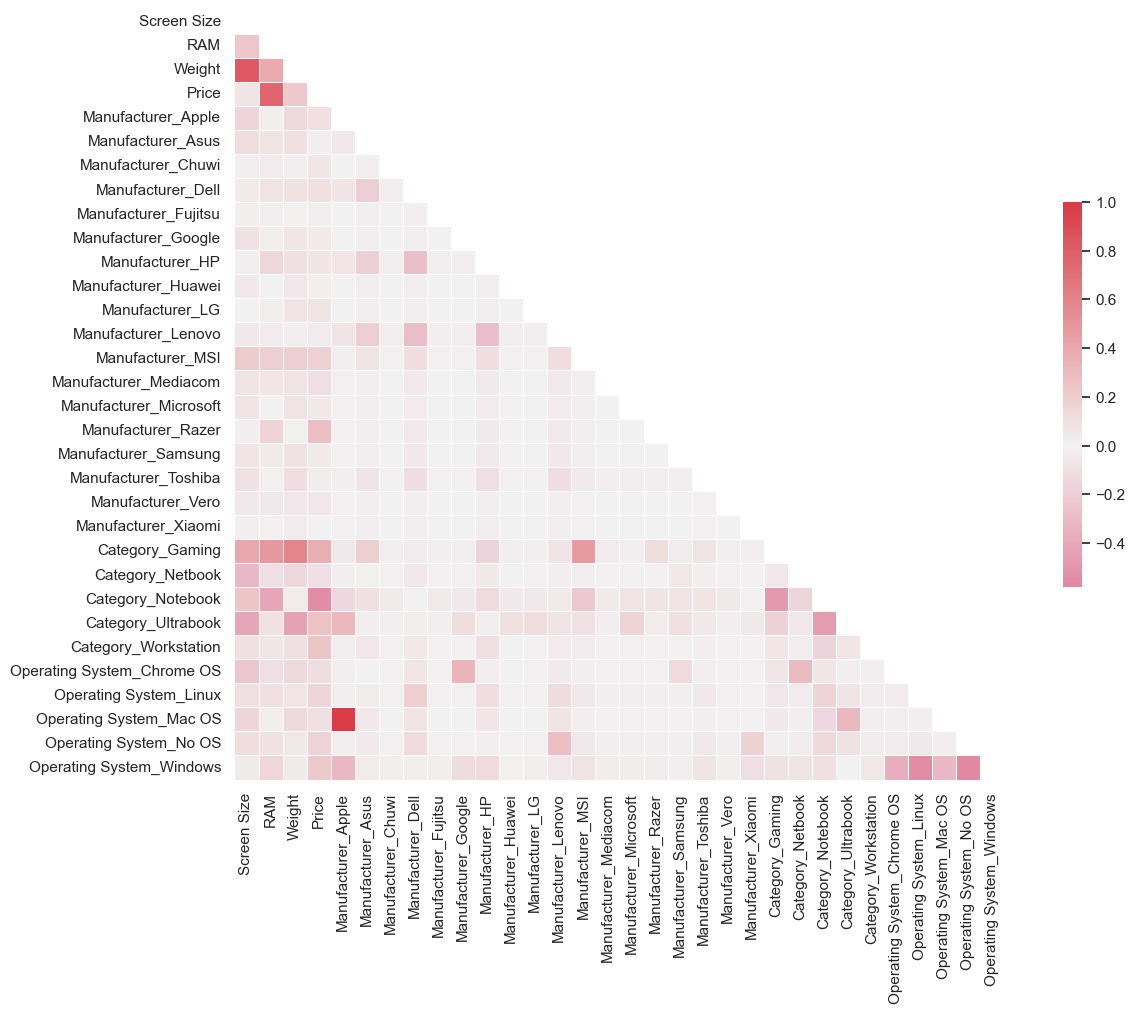

In [1623]:
#Buscamos colinealidad y correlación 

plt.figure(figsize=(15, 10))

sns.set(style='white')

mask=np.triu(np.ones_like(data.corr(), dtype=bool))

cmap=sns.diverging_palette(0, 10, as_cmap=True)


sns.heatmap(data.corr(),
           mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          #annot=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5});

In [1624]:
#Creamos una serie de columnas custom para poder dividir manteniendo el sentido la columna CPU y creamos la columna touchscreen para algo similar
#en la columna Screen

data['Touchscreen'] = 0
data['i3'] = 0
data['i5'] = 0
data['i7'] = 0
data['Atom'] = 0
data['Intel Core M'] = 0
data['Celeron'] = 0
data['Xeon'] = 0
data['AMD A'] = 0
data['AMD E'] = 0
data['AMD FX'] = 0
data['Samsung'] = 0
data['Pentium'] = 0
data['AMD Ryzen'] = 0

In [1625]:
data.head()

,Model Name,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System Version,Weight,Price,Manufacturer_Apple,Manufacturer_Asus,Manufacturer_Chuwi,Manufacturer_Dell,Manufacturer_Fujitsu,Manufacturer_Google,Manufacturer_HP,Manufacturer_Huawei,Manufacturer_LG,Manufacturer_Lenovo,Manufacturer_MSI,Manufacturer_Mediacom,Manufacturer_Microsoft,Manufacturer_Razer,Manufacturer_Samsung,Manufacturer_Toshiba,Manufacturer_Vero,Manufacturer_Xiaomi,Category_Gaming,Category_Netbook,Category_Notebook,Category_Ultrabook,Category_Workstation,Operating System_Chrome OS,Operating System_Linux,Operating System_Mac OS,Operating System_No OS,Operating System_Windows,Touchscreen,i3,i5,i7,Atom,Intel Core M,Celeron,Xeon,AMD A,AMD E,AMD FX,Samsung,Pentium,AMD Ryzen
0,MacBook Pro,13.30,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,NaN,1.37,11912523.48,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Macbook Air,13.30,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,NaN,1.34,7993374.48,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,250 G6,15.60,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,NaN,1.86,5112900.00,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,MacBook Pro,15.40,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,NaN,1.83,22563005.40,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,MacBook Pro,13.30,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,NaN,1.37,16037611.20,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [1626]:
#Dividimos por valores la columna Screen

for i in range(len(data.Screen)):
    if 'Touchscreen' in data['Screen'][i]:
        data['Touchscreen'][i] = 1
    if '4K' in data['Screen'][i]:
        data['Screen'][i] = 3
    elif 'Full HD' in data['Screen'][i]:
        data['Screen'][i] = 2
    elif 'HD' in data['Screen'][i] or 'Retina' in data['Screen'][i]:
        data['Screen'][i] = 1
    else:
        data['Screen'][i] = 1
        

In [1627]:
#Nos aseguramos de la correcta conversión del dato

data['Screen'] = data['Screen'].astype(int)

In [1628]:
#Dividimos la columna CPU en distintas columnas de valor numérico conservando datos de interes

for i in range(len(data.CPU)):

    if 'i3' in data['CPU'][i]:
        try:
            if data['CPU'][i][-6] == '.':
                data['i3'][i] = float(data['CPU'][i][-7:-3])
            else:
                data['i3'][i] = float(data['CPU'][i][-6:-3])
        except:
            data['i3'][i] = float(data['CPU'][i][-4:-3])
    elif 'i5' in data['CPU'][i]:
        try:
            if data['CPU'][i][-6] == '.':
                data['i5'][i] = float(data['CPU'][i][-7:-3])
            else:
                data['i5'][i] = float(data['CPU'][i][-6:-3])
        except:
            data['i5'][i] = float(data['CPU'][i][-4:-3])
    elif 'i7' in data['CPU'][i]:
        try:
            if data['CPU'][i][-6] == '.':
                data['i7'][i] = float(data['CPU'][i][-7:-3])
            else:
                data['i7'][i] = float(data['CPU'][i][-6:-3])
        except:
            data['i7'][i] = float(data['CPU'][i][-4:-3])
    elif 'Atom' in data['CPU'][i]:
        try:
            if data['CPU'][i][-6] == '.':
                data['Atom'][i] = float(data['CPU'][i][-7:-3])
            else:
                data['Atom'][i] = float(data['CPU'][i][-6:-3])
        except:
            data['Atom'][i] = float(data['CPU'][i][-4:-3])
    elif 'Celeron' in data['CPU'][i]:
        try:
            if data['CPU'][i][-6] == '.':
                data['Celeron'][i] = float(data['CPU'][i][-7:-3])
            else:
                data['Celeron'][i] = float(data['CPU'][i][-6:-3])
        except:
            data['Celeron'][i] = float(data['CPU'][i][-4:-3])
    elif 'Intel Core M' in data['CPU'][i]:
        try:
            if data['CPU'][i][-6] == '.':
                data['Intel Core M'][i] = float(data['CPU'][i][-7:-3])
            else:
                data['Intel Core M'][i] = float(data['CPU'][i][-6:-3])
        except:
            data['Intel Core M'][i] = float(data['CPU'][i][-4:-3])
    elif 'Xeon' in data['CPU'][i]:
        try:
            if data['CPU'][i][-6] == '.':
                data['Xeon'][i] = float(data['CPU'][i][-7:-3])
            else:
                data['Xeon'][i] = float(data['CPU'][i][-6:-3])
        except:
            data['Xeon'][i] = float(data['CPU'][i][-4:-3])
    elif 'AMD A' in data['CPU'][i]:
        try:
            if data['CPU'][i][-6] == '.':
                data['AMD A'][i] = float(data['CPU'][i][-7:-3])
            else:
                data['AMD A'][i] = float(data['CPU'][i][-6:-3])
        except:
            data['AMD A'][i] = float(data['CPU'][i][-4:-3])
    elif 'AMD E' in data['CPU'][i]:
        try:
            if data['CPU'][i][-6] == '.':
                data['AMD E'][i] = float(data['CPU'][i][-7:-3])
            else:
                data['AMD E'][i] = float(data['CPU'][i][-6:-3])
        except:
            data['AMD E'][i] = float(data['CPU'][i][-4:-3])
    elif 'AMD FX' in data['CPU'][i]:
        try:
            if data['CPU'][i][-6] == '.':
                data['AMD FX'][i] = float(data['CPU'][i][-7:-3])
            else:
                data['AMD FX'][i] = float(data['CPU'][i][-6:-3])
        except:
            data['AMD FX'][i] = float(data['CPU'][i][-4:-3])
    elif 'Samsung' in data['CPU'][i]:
        try:
            if data['CPU'][i][-6] == '.':
                data['Samsungs'][i] = float(data['CPU'][i][-7:-3])
            else:
                data['Samsung'][i] = float(data['CPU'][i][-6:-3])
        except:
            data['Samsung'][i] = float(data['CPU'][i][-4:-3])
    elif 'Pentium' in data['CPU'][i]:
        try:
            if data['CPU'][i][-6] == '.':
                data['Pentium'][i] = float(data['CPU'][i][-7:-3])
            else:
                data['Pentium'][i] = float(data['CPU'][i][-6:-3])
        except:
            data['Pentium'][i] = float(data['CPU'][i][-4:-3])
    elif 'AMD R' in data['CPU'][i]:
        try:
            if data['CPU'][i][-6] == '.':
                data['AMD Ryzen'][i] = float(data['CPU'][i][-7:-3])
            else:
                data['AMD Ryzen'][i] = float(data['CPU'][i][-6:-3])
        except:
            data['AMD Ryzen'][i] = float(data['CPU'][i][-4:-3])
    

In [1629]:
#Visualizamos la columna GPU para hacer algo parecido a la de CPU

data['GPU'].value_counts()

Intel HD Graphics 620             281
Intel HD Graphics 520             185
Intel UHD Graphics 620             68
Nvidia GeForce GTX 1050            66
Nvidia GeForce GTX 1060            48
Nvidia GeForce 940MX               43
AMD Radeon 530                     41
Intel HD Graphics 500              39
Intel HD Graphics 400              37
Nvidia GeForce GTX 1070            30
Intel HD Graphics                  29
Nvidia GeForce GTX 1050 Ti         28
AMD Radeon R5 M430                 22
Nvidia GeForce 930MX               20
AMD Radeon 520                     17
Nvidia GeForce MX150               15
Intel HD Graphics 515              15
Intel HD Graphics 615              14
AMD Radeon R7 M445                 14
Nvidia GeForce GTX 960M            14
Nvidia GeForce 920MX               13
Intel HD Graphics 505              12
AMD Radeon R5                      11
Nvidia GeForce GTX 980M            10
Intel HD Graphics 405               9
Nvidia Quadro M1200                 9
AMD Radeon R

In [1630]:
#Creamos columnas costum para dividir la clumna memoria y la de GPU

data['SSD'] = 0
data['HDD'] = 0
data['Hybrid'] = 0
data['Flash'] = 0
data['Graphics'] = 0
data['GeForce'] = 0
data['R2'] = 0
data['R3'] = 0
data['R4'] = 0
data['RX'] = 0
data['R9'] = 0
data['R5'] = 0
data['R7'] = 0
data['ARM'] = 0
data['Radeon'] = 0
data['Quadro'] = 0


In [1631]:
#Dividimos la columna memoria conservando los datos de SDD, HDD , Flash y Hybrid

for i in range(len(data[' Storage'])):

    if '+' in data[' Storage'][i]:
        if 'Flash' in data[' Storage'][i]:
            data['Flash'][i] = int(data[' Storage'][i].split(' +  ')[0][0:2])
            data['HDD'][i] = 1000
        elif 'HDD' in data[' Storage'][i] and 'SSD' not in data[' Storage'][i]:
            data['HDD'][i] = 2000
        elif 'HDD' in data[' Storage'][i]:
            if 'TB' in data[' Storage'][i].split(' +  ')[0]:
                data['SSD'][i] = int(data[' Storage'][i].split(' +  ')[0][0])*1000
            elif 'G' in data[' Storage'][i].split(' +  ')[0][2]:
                data['SSD'][i] = int(data[' Storage'][i].split(' +  ')[0][0:2])
            else:
                data['SSD'][i] = int(data[' Storage'][i].split(' +  ')[0][0:3])
            if 'TB' in data[' Storage'][i].split(' +  ')[1]:
                data['HDD'][i] = int(data[' Storage'][i].split(' +  ')[1][0])*1000
            elif 'G' in data[' Storage'][i].split(' +  ')[1][2]:
                data['HDD'][i] = int(data[' Storage'][i].split(' +  ')[1][0:2])
            else:
                data['HDD'][i] = int(data[' Storage'][i].split(' +  ')[1][0:3])
        elif 'Hybrid' in data[' Storage'][i]:
            data['SSD'][i] = int(data[' Storage'][i].split(' +  ')[0][0:3])
            data['Hybrid'][i] = 1000
        else:
            data['SSD'][i] = int(data[' Storage'][i].split(' +  ')[0][0:3]) + int(data[' Storage'][i].split(' +  ')[1][0:3])
    else:
        if 'TB' in data[' Storage'][i]:
            if 'Hybrid' in data[' Storage'][i]:
                data['Hybrid'][i] = 1000
            if 'SSD' in data[' Storage'][i]:
                data['SSD'][i] = 1000
            else:
                data['HDD'][i] = int(data[' Storage'][i][0])*1000
        else:
            if 'G' in data[' Storage'][i][2]:
                if 'SSD' in data[' Storage'][i]:
                    data['SSD'][i] = int(data[' Storage'][i][0:2])
                if 'HDD' in data[' Storage'][i]:
                    data['HDD'][i] = int(data[' Storage'][i][0:2])
                if 'Flash' in data[' Storage'][i]:
                    data['Flash'][i] = int(data[' Storage'][i][0:2])
                if 'Hybrid' in data[' Storage'][i]:
                    data['Hybrid'][i] = int(data[' Storage'][i][0:2])
            elif 'G' in data[' Storage'][i][1]:
                if 'SSD' in data[' Storage'][i]:
                    data['SSD'][i] = int(data[' Storage'][i][0])
                if 'HDD' in data[' Storage'][i]:
                    data['HDD'][i] = int(data[' Storage'][i][0])
                if 'Flash' in data[' Storage'][i]:
                    data['Flash'][i] = int(data[' Storage'][i][0])
                if 'Hybrid' in data[' Storage'][i]:
                    data['Hybrid'][i] = int(data[' Storage'][i][0])
            else:
                if 'SSD' in data[' Storage'][i]:
                    data['SSD'][i] = int(data[' Storage'][i][0:3])
                if 'HDD' in data[' Storage'][i]:
                    data['HDD'][i] = int(data[' Storage'][i][0:3])
                if 'Flash' in data[' Storage'][i]:
                    data['Flash'][i] = int(data[' Storage'][i][0:3])
                if 'Hybrid' in data[' Storage'][i]:
                    data['Hybrid'][i] = int(data[' Storage'][i][0:3])
     

In [1632]:
#Dividimos la columna GPU como hicimos con la de CPU

for i in range(len(data['GPU'])):
    if 'Graphics' in data['GPU'][i]:
        if 's' in data['GPU'][i][-1]:
            data['Graphics'][i] = 250
        else:
            data['Graphics'][i] = int(data['GPU'][i][-3:])
    elif 'R5' in data['GPU'][i]:
        data['R5'][i] = 1
    elif 'R7' in data['GPU'][i]:
        data['R7'][i] = 1
    elif 'R2' in data['GPU'][i]:
        data['R2'][i] = 1
    elif 'R3' in data['GPU'][i]:
        data['R3'][i] = 1
    elif 'R4' in data['GPU'][i]:
        data['R4'][i] = 1
    elif 'RX' in data['GPU'][i]:
        data['RX'][i] = 1
    elif 'R9' in data['GPU'][i]:
        data['R9'][i] = 1
    elif 'ARM' in data['GPU'][i]:
        data['ARM'][i] = 1
    elif 'GeForce' in data['GPU'][i]:
        if 'Ti' in data['GPU'][i]:
            data['GeForce'][i] = 1050
        elif '130' in data['GPU'][i]:
            data['GeForce'][i] = 700
        elif '150' in data['GPU'][i]:
            data['GeForce'][i] = 950
        elif 'MX' in data['GPU'][i]:
            if ' ' in data['GPU'][i][-1]:
                data['GeForce'][i] = int(data['GPU'][i][-6:-3])
            else:
                data['GeForce'][i] = int(data['GPU'][i][-5:-2])
        elif 'M' in data['GPU'][i]:
            if ' ' in data['GPU'][i][-5]:
                data['GeForce'][i] = int(data['GPU'][i][-4:-1])
            else: 
                data['GeForce'][i] = int(data['GPU'][i][-5:-1])
        elif '<U+039C>' in data['GPU'][i]:
            data['GeForce'][i] = 960
        else:
            if ' ' in data['GPU'][i][-4]:
                data['GeForce'][i] = int(data['GPU'][i][-3:])
            else:
                data['GeForce'][i] = int(data['GPU'][i][-4:])
    elif 'Quadro' in data['GPU'][i]:
        if 'M' in data['GPU'][i][-1]:
            if 'M' in data['GPU'][i][-5] or ' ' in data['GPU'][i][-5]:
                data['Quadro'][i] = int(data['GPU'][i][-4:-1])
            else:
                data['Quadro'][i] = int(data['GPU'][i][-5:-1])
        else:
            if 'M' in data['GPU'][i][-4] or ' ' in data['GPU'][i][-4]:
                data['Quadro'][i] = int(data['GPU'][i][-3:])
            else:
                data['Quadro'][i] = int(data['GPU'][i][-4:])
    elif 'Radeon' in data['GPU'][i]:
        data['Radeon'][i] = int(data['GPU'][i][-3:])
            

In [1633]:
#Comprobamos que está todo bien

data.head()

,Model Name,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System Version,Weight,Price,Manufacturer_Apple,Manufacturer_Asus,Manufacturer_Chuwi,Manufacturer_Dell,Manufacturer_Fujitsu,Manufacturer_Google,Manufacturer_HP,Manufacturer_Huawei,Manufacturer_LG,Manufacturer_Lenovo,Manufacturer_MSI,Manufacturer_Mediacom,Manufacturer_Microsoft,Manufacturer_Razer,Manufacturer_Samsung,Manufacturer_Toshiba,Manufacturer_Vero,Manufacturer_Xiaomi,Category_Gaming,Category_Netbook,Category_Notebook,Category_Ultrabook,Category_Workstation,Operating System_Chrome OS,Operating System_Linux,Operating System_Mac OS,Operating System_No OS,Operating System_Windows,Touchscreen,i3,i5,i7,Atom,Intel Core M,Celeron,Xeon,AMD A,AMD E,AMD FX,Samsung,Pentium,AMD Ryzen,SSD,HDD,Hybrid,Flash,Graphics,GeForce,R2,R3,R4,RX,R9,R5,R7,ARM,Radeon,Quadro
0,MacBook Pro,13.30,1,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,NaN,1.37,11912523.48,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0.00,2.30,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0.00,0.00,128,0,0,0,640,0,0,0,0,0,0,0,0,0,0,0
1,Macbook Air,13.30,1,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,NaN,1.34,7993374.48,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0.00,1.80,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0.00,0.00,0,0,0,128,0,0,0,0,0,0,0,0,0,0,0,0
2,250 G6,15.60,2,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,NaN,1.86,5112900.00,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0.00,2.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0.00,0.00,256,0,0,0,620,0,0,0,0,0,0,0,0,0,0,0
3,MacBook Pro,15.40,1,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,NaN,1.83,22563005.40,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0.00,0.00,2.70,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0.00,0.00,512,0,0,0,0,0,0,0,0,0,0,0,0,0,455,0
4,MacBook Pro,13.30,1,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,NaN,1.37,16037611.20,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0.00,3.10,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0.00,0.00,256,0,0,0,650,0,0,0,0,0,0,0,0,0,0,0


In [1634]:
pd.unique(data['Model Name'])

array(['MacBook Pro', 'Macbook Air', '250 G6', 'Aspire 3',
       'ZenBook UX430UN', 'Swift 3', 'Inspiron 3567', 'MacBook 12"',
       'IdeaPad 320-15IKB', 'XPS 13', 'Vivobook E200HA',
       'Legion Y520-15IKBN', '255 G6', 'Inspiron 5379',
       '15-BS101nv (i7-8550U/8GB/256GB/FHD/W10)', 'MacBook Air',
       'Inspiron 5570', 'Latitude 5590', 'ProBook 470', 'LapBook 15.6"',
       'E402WA-GA010T (E2-6110/2GB/32GB/W10)',
       '17-ak001nv (A6-9220/4GB/500GB/Radeon', 'IdeaPad 120S-14IAP',
       'Inspiron 5770', 'ProBook 450',
       'X540UA-DM186 (i3-6006U/4GB/1TB/FHD/Linux)', 'Inspiron 7577',
       'X542UQ-GO005 (i5-7200U/8GB/1TB/GeForce', 'Aspire A515-51G',
       'Inspiron 7773', 'IdeaPad 320-15ISK', 'Rog Strix',
       'X751NV-TY001T (N4200/4GB/1TB/GeForce', 'Yoga Book', 'ProBook 430',
       'Inspiron 3576', '15-bs002nv (i3-6006U/4GB/128GB/FHD/W10)',
       'VivoBook Max', 'GS73VR 7RG',
       'X541UA-DM1897 (i3-6006U/4GB/256GB/FHD/Linux)', 'Vostro 5471',
       'IdeaPad 520S-1

In [1635]:
# for i in range(len(data['Model Name'])):
#     if 'Inspiron' in data['Model Name'][i]:
#         data['Model Name'][i] = 'Inspiron'
#     elif 'Aspire' in data['Model Name'][i]:
#         data['Model Name'][i] = 'Aspire'
#     elif 'Pavilion' in data['Model Name'][i]:
#         data['Model Name'][i] = 'Pavilion'
#     elif 'Yoga' in data['Model Name'][i]:
#         data['Model Name'][i] = 'Yoga'
#     elif 'Pad' in data['Model Name'][i]:
#         data['Model Name'][i] = 'Pad'
#     elif 'Alienware' in data['Model Name'][i]:
#         data['Model Name'][i] = 'Alien'
#     elif 'Omen' in data['Model Name'][i]:
#         data['Model Name'][i] = 'Omen'
#     elif 'Tecra' in data['Model Name'][i]:
#         data['Model Name'][i] = 'Tecra'
#     elif 'Latitude' in data['Model Name'][i]:
#         data['Model Name'][i] = 'Lat'
#     elif 'Rog' in data['Model Name'][i]:
#         data['Model Name'][i] = 'Rog'
#     else:
#         data['Model Name'][i] = 'Other'

In [1636]:
#data = pd.get_dummies(data, columns=['Model Name'], drop_first=True)

In [1637]:
#data['Operating System Version'] = data['Operating System Version'].fillna(0)

In [1638]:
# data['Operating System Version'] = data['Operating System Version'].replace('X',8)
# data['Operating System Version'] = data['Operating System Version'].replace('10 S',11)

In [1639]:
#data['Operating System Version'] = data['Operating System Version'].astype(int)

In [1640]:
data = data.drop(['Model Name','CPU',' Storage','GPU','Operating System Version','Weight'],axis=1)

In [1641]:
pd.set_option('display.max_columns',None)
data.head()

,Screen Size,Screen,RAM,Price,Manufacturer_Apple,Manufacturer_Asus,Manufacturer_Chuwi,Manufacturer_Dell,Manufacturer_Fujitsu,Manufacturer_Google,Manufacturer_HP,Manufacturer_Huawei,Manufacturer_LG,Manufacturer_Lenovo,Manufacturer_MSI,Manufacturer_Mediacom,Manufacturer_Microsoft,Manufacturer_Razer,Manufacturer_Samsung,Manufacturer_Toshiba,Manufacturer_Vero,Manufacturer_Xiaomi,Category_Gaming,Category_Netbook,Category_Notebook,Category_Ultrabook,Category_Workstation,Operating System_Chrome OS,Operating System_Linux,Operating System_Mac OS,Operating System_No OS,Operating System_Windows,Touchscreen,i3,i5,i7,Atom,Intel Core M,Celeron,Xeon,AMD A,AMD E,AMD FX,Samsung,Pentium,AMD Ryzen,SSD,HDD,Hybrid,Flash,Graphics,GeForce,R2,R3,R4,RX,R9,R5,R7,ARM,Radeon,Quadro
0,13.30,1,8,11912523.48,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0.00,2.30,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0.00,0.00,128,0,0,0,640,0,0,0,0,0,0,0,0,0,0,0
1,13.30,1,8,7993374.48,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0.00,1.80,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0.00,0.00,0,0,0,128,0,0,0,0,0,0,0,0,0,0,0,0
2,15.60,2,8,5112900.00,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0.00,2.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0.00,0.00,256,0,0,0,620,0,0,0,0,0,0,0,0,0,0,0
3,15.40,1,16,22563005.40,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0.00,0.00,2.70,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0.00,0.00,512,0,0,0,0,0,0,0,0,0,0,0,0,0,455,0
4,13.30,1,8,16037611.20,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0.00,3.10,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0.00,0.00,256,0,0,0,650,0,0,0,0,0,0,0,0,0,0,0


In [1642]:
X_test = data[data['Price'].isna()]

In [1643]:
X_train = data.drop(data[data['Price'].isna()].index,axis=0)

In [1644]:
y_train = X_train['Price']

In [1645]:
X_train = X_train.drop(['Price'],axis=1)

In [1646]:
from catboost import CatBoostRegressor as CTR

ctr=CTR()

In [1647]:
ctr.fit(X_train, y_train, verbose=0)

In [1648]:
y_pred = ctr.predict(X_test)

In [1649]:
y_preddf = pd.DataFrame(y_pred)

In [1650]:
y_preddf['id'] = y_preddf.index

In [1651]:
y_preddf.columns = ['Price','id']

In [1652]:
y_preddf = y_preddf.reindex(columns=['id','Price'])

In [1653]:
#y_preddf.set_index('id')

In [1654]:
y_preddf.head()

,id,Price
0,0,5967347.19
1,1,13497496.84
2,2,13659025.93
3,3,10285722.99
4,4,5274922.63


In [1655]:
y_preddf.to_csv('predicciones.csv',index = False)

In [1656]:
from sklearn.model_selection import train_test_split as tts  # el alias es cosa mia


X_train2, X_test2, y_train2, y_test2 = tts(X_train, y_train, 
                                       train_size=0.8, 
                                       test_size=0.2,
                                       random_state=42
                                      )

In [1657]:
# from lazypredict.Supervised import LazyRegressor 

# lazy=LazyRegressor()

In [1658]:
#lazy.fit(X_train2, X_test2, y_train2, y_test2)

In [1659]:
from sklearn.metrics import mean_squared_error as mse 
ctr.fit(X_train2, y_train2, verbose=0)
y_pred = ctr.predict(X_test2)

mse(y_test2, y_pred, squared=False)

1961470.0128684847